In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools

In [93]:

transition_matrix = np.array([[0.7,0.3],[0.1,0.9]])

def generate_markov_chain(transition_matrix, num_steps, initial_state):
    num_states = len(transition_matrix)
    current_state = initial_state
    markov_chain = [current_state]

    for _ in range(num_steps - 1):
        # Choose the next state based on the transition probabilities
        next_state = np.random.choice(num_states, p=transition_matrix[current_state])
        markov_chain.append(next_state)
        current_state = next_state

    return markov_chain

# Number of steps to generate in the Markov chain
num_steps = 10

# Generate Markov chain
initial_states = np.random.binomial(n=1, p=0.3, size=30)
num_nodes = 30
nodes = range(1,31)
num_groups = 2

In [142]:
Z_nodes_time = np.array([generate_markov_chain(transition_matrix, 10, initial_states[i]) for i in range(30)])
Z_nodes_time

array([[1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 1, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0, 1, 0, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 1, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 0, 0],
       [1, 1, 0, 0, 0, 0,

In [95]:
num_matrices = 10

# Initialize an empty list to store the matrices
symmetric_matrices = []

# Generate 10 random symmetric matrices close to 1
for _ in range(num_matrices):
    # Generate a random 2x2 matrix with values close to 1
    random_matrix = np.random.rand(2, 2)

    # Make the matrix symmetric
    symmetric_matrix = 0.5 * (random_matrix + random_matrix.T)

    # Append the symmetric matrix to the list
    symmetric_matrices.append(symmetric_matrix)


In [96]:
edges = []

for time in range(num_steps):
    q_values = Z_nodes_time[:, time]
    symmetric_matrix = symmetric_matrices[time]

    # Create a random matrix based on binomial distribution
    edge_time = np.random.binomial(n=1, p=symmetric_matrix[q_values, :][:, q_values])

    # Ensure symmetry
    edge_time = np.maximum(edge_time, edge_time.T)

    edges.append(edge_time)


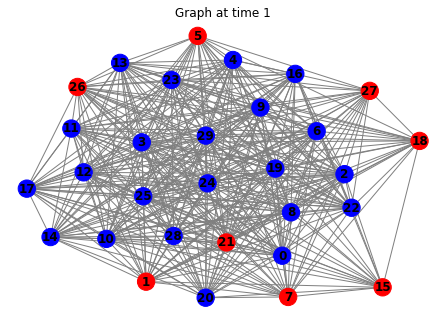

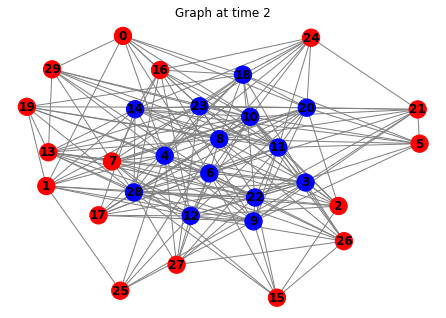

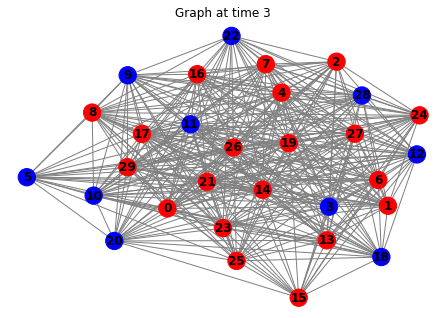

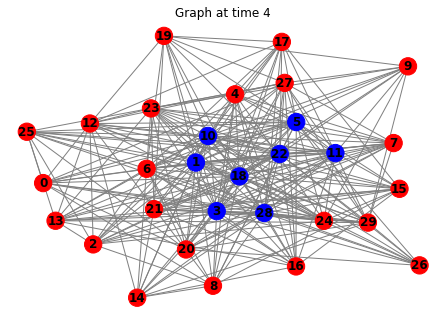

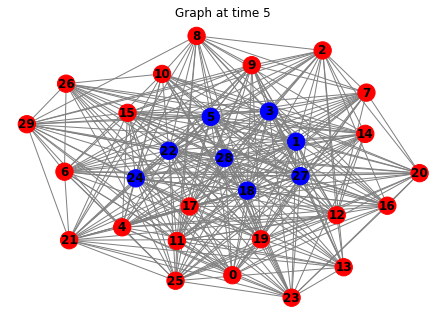

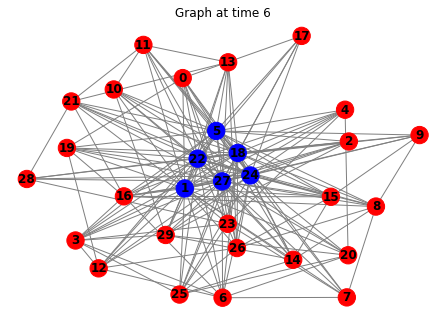

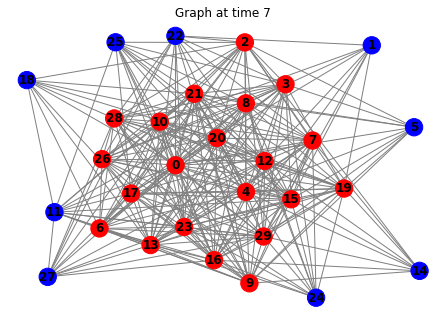

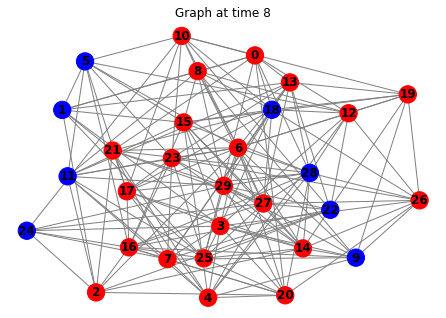

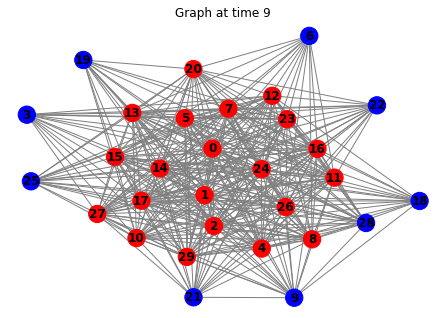

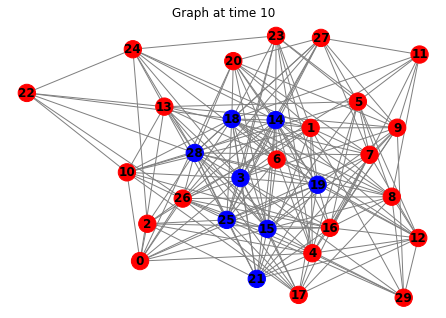

In [97]:
graphs = []
for time in range(num_steps):
    G = nx.from_numpy_array(edges[time])
    graphs.append(G)
    # Choose colors for nodes based on their states
    node_colors = ['red' if state == 1 else 'blue' for state in Z_nodes_time[:, time]]

    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=300, node_color=node_colors, font_color='black', edge_color='gray')

    plt.title(f'Graph at time {time + 1}')
    plt.show()

# Descriptive Statistics

In [57]:
motifs = {
    '2-star': nx.Graph([(1,2),(2,3)]),
    'Triangle': nx.DiGraph([(1,2),(1,3),(2,3)]),
    'Square': nx.Graph([(1,2),(2,3),(3,4),(1,4)]),
    'Square_one_diag': nx.Graph([(1,2),(3,2),(3,4), (1,4), (1,3)])
    }



def calculate_closeness(G):
    closeness_centrality = {}
    for node in G.nodes():
        closeness_centrality[node] = nx.closeness_centrality(G, node, wf_improved = False)
    return closeness_centrality

def calculate_centrality(G):
    return nx.degree_centrality(G)

def calculate_betweenness(G):
    return nx.betweenness_centrality(G)

def calculate_motif_count(G, mo):
    mcount = dict(zip(mo.keys(), list(map(int, np.zeros(len(mo))))))
    nodes = G.nodes()

    triplets = list(itertools.product(*[nodes, nodes, nodes]))
    quadralets = list(itertools.product(*[nodes, nodes, nodes, nodes]))
    triplets = [trip for trip in triplets if len(list(set(trip))) == 3]
    quadralets = [quad for quad in quadralets if len(list(set(quad))) == 4]
    triplets = map(list, map(np.sort, triplets))
    u_triplets = []

    for trip in triplets:
        if u_triplets.count(trip)== 0:
            u_triplets.append(trip)

    quadralets = map(list, map(np.sort, quadralets))
    u_quadralets = []
    for quad in quadralets:
        if u_quadralets.count(quad)== 0:
            u_quadralets.append(quad)
    three_node_mo = list(mo.keys())[0:2]
    four_node_mo = list(mo.keys())[2:4]


    for trip in u_triplets:
        sub_gr = G.subgraph(trip)
        mot_match = list(map(lambda mot_id: nx.is_isomorphic(sub_gr, mo[mot_id]), three_node_mo))
        match_keys = [three_node_mo[i] for i in range(2) if mot_match[i]]
        if len(match_keys) == 1:
            mcount[match_keys[0]] += 1
    for quad in u_quadralets:
        sub_gr = G.subgraph(quad)
        mot_match = list(map(lambda mot_id: nx.is_isomorphic(sub_gr, mo[mot_id]), four_node_mo))
        match_keys = [four_node_mo[i] for i in range(2) if mot_match[i]]
        if len(match_keys) == 1:
            mcount[match_keys[0]] += 1
    return mcount



## Calculating triangles in the graphs

In [112]:
triangles = [sum(nx.triangles(graph).values()) // 3 for graph in graphs]

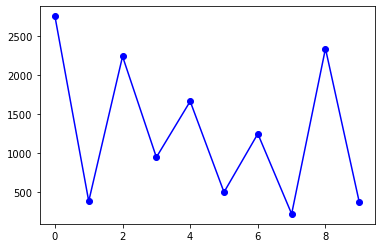

In [113]:
plt.plot(triangles, marker='o', linestyle='-', color='b')

# Adding the code together

In [22]:
num_steps = 5
initial_states = np.array([np.random.choice([0,1,2]) for _ in range(30)])
num_nodes = 30
nodes = range(1,31)
num_groups = 3



In [23]:

## Creating beta_t matrices randomly


num_matrices = 5

symmetric_matrices = []

for _ in range(num_matrices):
    random_matrix = np.random.rand(3, 3)
    symmetric_matrix = 0.5 * (random_matrix + random_matrix.T)
    symmetric_matrices.append(symmetric_matrix)

In [161]:
matrices = [np.array([[0.6,0.3],[0.3,0.7]]),
           np.array([[0.78,0.4],[0.4,0.84]]),
           np.array([[0.74,0.4],[0.4,0.7]]),
           np.array([[0.62,0.41],[0.41,0.6]]),
           np.array([[0.87,0.6],[0.6,0.5]])]

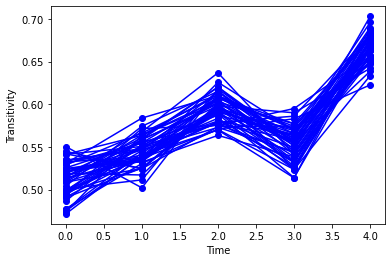

In [107]:

## Creating Transition Matrix

transition_matrix = np.array([[0.8 , 0.05 , 0.15],[0.2,0.75,0.05],[0.25,0.2,0.55]])

## Creating Z_i^t's
# Number of nodes
num_nodes = 30

# Initial states for each node
initial_states = np.random.choice([0, 1, 2], size=num_nodes)

# Number of time steps
num_steps = 5  # You can adjust this based on your requirements

# Initialize an array to store the Markov chains for each node
markov_chains = np.zeros((num_nodes, num_steps), dtype=int)

# Generate Markov chains
for node in range(num_nodes):
    current_state = initial_states[node]
    for step in range(num_steps):
        markov_chains[node, step] = current_state
        current_state = np.random.choice([0, 1, 2], p=transition_matrix[current_state])



## Creating graphs and plotting number of triangles

def plot_triangles(num_nodes, num_steps, Z_nodes_time, symmetric_matrices, initial_states, num_groups=3, plot_networks = False):
    edges = []

    for time in range(num_steps):
        edge_time = np.zeros(shape=(num_nodes, num_nodes))
        for i in range(num_nodes):
            for j in range(num_nodes):
                q = Z_nodes_time[i, time]
                l = Z_nodes_time[j, time]  # Corrected the index for l
                beta_ql_t = symmetric_matrices[time][q, l]
                edge_time[i, j] = int(np.random.binomial(n=1, p=beta_ql_t, size=1)[0])
        edges.append(edge_time)
    
    graphs = []
    for time in range(num_steps):
        G = nx.from_numpy_array(edges[time], create_using=nx.DiGraph)
        graphs.append(G)
        if plot_networks:
            # Choose colors for nodes based on their states
            node_colors = ['red' if state == 1 else 'blue' for state in Z_nodes_time[:, time]]

            # Draw the graph
            pos = nx.spring_layout(G)
            nx.draw(
                G,
                pos,
                with_labels=True,
                font_weight='bold',
                node_size=300,
                node_color=node_colors,
                font_color='black',
                edge_color='gray',
            )

            plt.title(f'Graph at time {time + 1}')
            plt.show()
    
    #triangles = [sum(nx.triangles(graph).values()) // 3 for graph in graphs]
    #plt.plot(triangles, marker='o', linestyle='-', color='b')
    
    
    #for graph in graphs:
    #    centr = calculate_betweenness(graph)
    #    plt.plot([int(x) for x in centr.keys()], centr.values(), label='Line Plot')
    
    #print([nx.degree_centrality(graph) for graph in graphs])
    
    triangles = [nx.transitivity(graph) for graph in graphs]
    #calculate_motif_count(graphs[0], motifs)
    plt.plot(triangles, marker='o', linestyle='-', color='b')
    plt.xlabel('Time')
    plt.ylabel('Transitivity')
    
    

    
#plot_triangles(num_nodes= num_nodes,
#                   num_steps= num_steps, Z_nodes_time= markov_chains, 
#                   symmetric_matrices= matrices,
#                   symmetric_matrices= symmetric_matrices, 
#                   initial_states= initial_states, 
#                   num_groups=3, plot_networks = False)    
    
    
### PLotting    

for _ in range(50):
    plot_triangles(num_nodes = num_nodes,num_steps = num_steps, 
                   Z_nodes_time= markov_chains, symmetric_matrices= symmetric_matrices,
                   initial_states= initial_states,num_groups=3, plot_networks = False)
plt.show()

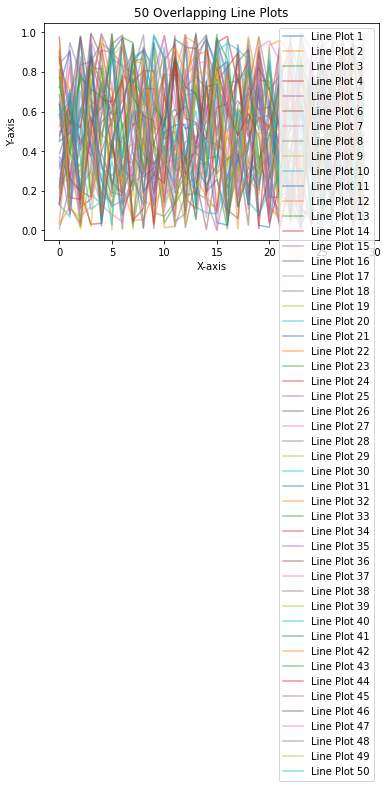

In [86]:
num_plots = 50

# Number of values for each line plot
num_values = 30

# Generate and plot sample data for each line plot
for i in range(num_plots):
    x_values = np.arange(num_values)
    y_values = np.random.rand(num_values)  # Replace this with your actual y-values

    # Plot the line on the same set of axes
    plt.plot(x_values, y_values, label=f'Line Plot {i + 1}', alpha=0.5)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('50 Overlapping Line Plots')

# Add legend
plt.legend()

# Show the plot
plt.show()